In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().values.any()

False

In [5]:
#Univariate Analysis

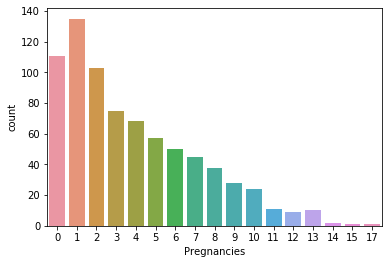

In [6]:
sns.countplot(x="Pregnancies", data = df)

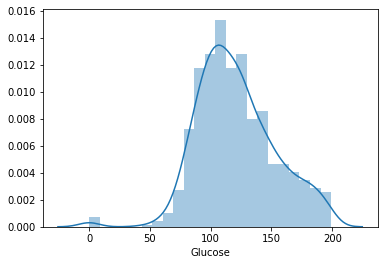

In [7]:
sns.distplot(df["Glucose"])

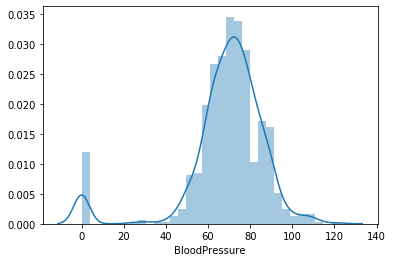

In [8]:
sns.distplot(df["BloodPressure"])

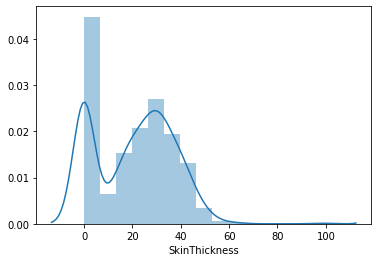

In [9]:
sns.distplot(df["SkinThickness"])

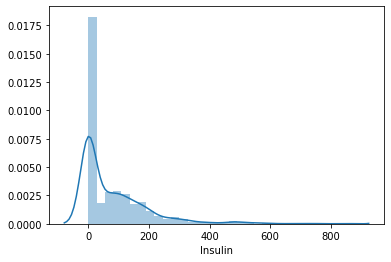

In [10]:
sns.distplot(df["Insulin"])

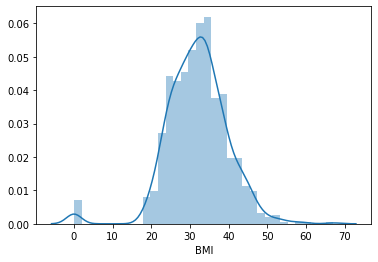

In [11]:
sns.distplot(df["BMI"])

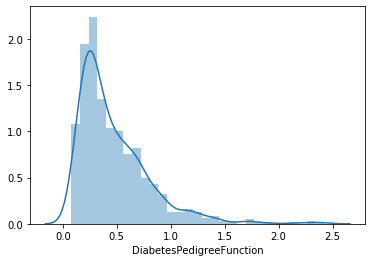

In [12]:
sns.distplot(df["DiabetesPedigreeFunction"])

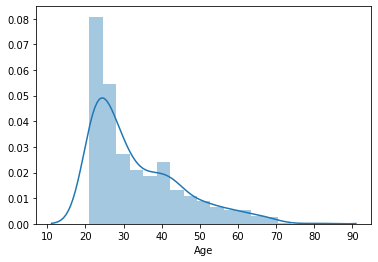

In [13]:
sns.distplot(df["Age"])

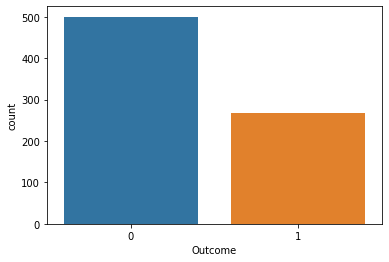

In [14]:
sns.countplot(x="Outcome", data=df)

In [15]:
#Bivariate Analysis

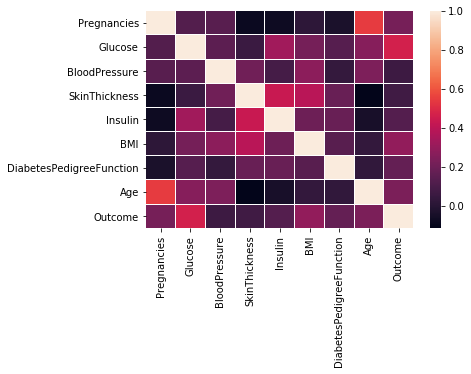

In [16]:
sns.heatmap(df.corr(), linewidths = 0.01)

In [17]:
#INSIGHTS - Blood Pressure, Insulin, SkinThickness, Insulin, BMI can't be zero
#Replacing the zero value with the average value

In [18]:
Gl_A = np.array(df.iloc[:,1].values)
for i in range (0, len(Gl_A)):
    if Gl_A[i] == 0 :
        (df["Glucose"].replace(df["Glucose"][i], round(df["Glucose"].mean(),2), inplace = True),2)

In [19]:
Bp_A = np.array(df.iloc[:,2].values)
for i in range (0, len(Bp_A)):
    if Bp_A[i] == 0 :
        (df["BloodPressure"].replace(df["BloodPressure"][i], round(df["BloodPressure"].mean(),2), inplace = True),2)

In [20]:
Sk_A = np.array(df.iloc[:,3].values)
for i in range (0, len(Sk_A)):
    if Sk_A[i] == 0 :
        (df["SkinThickness"].replace(df["SkinThickness"][i], round(df["SkinThickness"].mean(),2), inplace = True),2)

In [21]:
In_A = np.array(df.iloc[:,4].values)
for i in range (0, len(In_A)):
    if In_A[i] == 0 :
        (df["Insulin"].replace(df["Insulin"][i], round(df["Insulin"].mean(),2), inplace = True),2)

In [22]:
BMI_A = np.array(df.iloc[:,4].values)
for i in range (0, len(BMI_A)):
    if BMI_A[i] == 0 :
        (df["BMI"].replace(df["BMI"][i], round(df["BMI"].mean(),2), inplace = True),2)

In [23]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,155.54,33.6,0.627,50,1
1,1,85.0,66.0,29.00,155.54,26.6,0.351,31,0
2,8,183.0,64.0,29.15,155.54,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.00,32.9,0.171,63,0
764,2,122.0,70.0,27.00,155.54,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.00,26.2,0.245,30,0
766,1,126.0,60.0,29.15,155.54,30.1,0.349,47,1


In [24]:
#Creating Model

In [25]:
X = df.iloc[:,:-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [26]:
Y = df.iloc[:,-1].values
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.30, random_state = 30)

In [28]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(x_train, y_train)

In [30]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [31]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[140,  19],
       [ 27,  45]], dtype=int64)

In [35]:
confusion_matrix = pd.DataFrame(cm)
confusion_matrix.columns = ['Predicted NO for Diabetes', 'Predicted YES for Diabetes']
confusion_matrix = confusion_matrix.rename(index = { 0 : 'Actual NO for Diabetes', 1 : 'Actual YES for Diabetes'})
confusion_matrix


,Predicted NO for Diabetes,Predicted YES for Diabetes
Actual NO for Diabetes,140,19
Actual YES for Diabetes,27,45


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print('Accuracy is : ', round(accuracy, 2)*100)
print('Recall is : ', round(recall, 2)*100)
print('Precision is : ', round(precision, 2)*100)
print('F1 Score is : ', round(f1, 2)*100)
print('Accuracy is : ', round(accuracy, 2)*100)
print('Roc Auc is : ', round(roc_auc, 2)*100)

Accuracy is :  80.0
Recall is :  62.0
Precision is :  70.0
F1 Score is :  66.0
Accuracy is :  80.0
Roc Auc is :  75.0
